# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("Employee_productivity.csv")

print(df.head())
print(df.info())
print(df.describe())

   HoursWorked  FocusScore  ProductivityScore   Department  YearsAtCompany  \
0         42.4         6.3            3127.96  Engineering              17   
1         34.0         7.2            4742.60           HR               8   
2         47.2         5.6            2044.73        Sales              15   
3         38.4         9.0            5818.92           HR               5   
4         36.4         2.5            1841.31        Sales               9   

   TeamMeetingsPerWeek    DeskLocation  
0                    0       Open Plan  
1                    6  Private Office  
2                    3          Remote  
3                    6  Private Office  
4                    6          Remote  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HoursWorked          300 non-null    float64
 1   FocusScore           300 n

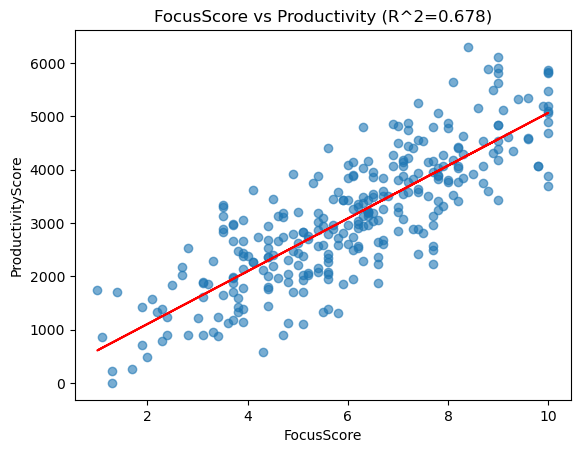

{'FocusScore': 0.6776960770307456}


In [16]:
features = ["YearsAtCompany", "HoursWorked", "FocusScore"]
r2_values = {}

for feature in features:
    x = df[[feature]]
    y = df["ProductivityScore"]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
r2_values[feature] = r2

plt.scatter(x, y, alpha=0.6)
plt.plot(x, y_pred, color="red")
plt.title(f"{feature} vs Productivity (R^2={r2:.3f})")
plt.xlabel(feature)
plt.ylabel("ProductivityScore")
plt.show()

print(r2_values)

In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)

x = df_encoded.drop(columns=["ProductivityScore"])
y = df_encoded["ProductivityScore"]

model_all = LinearRegression()
model_all.fit(x, y)
y_pred_all = model_all.predict(x)
r2_all = r2_score(y, y_pred_all)

print("Overall R^2 for full model:", round(r2_all, 3))

coefficients = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model_all.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

Overall R^2 for full model: 0.685
                       Feature  Coefficient
1                   FocusScore   512.719278
3          TeamMeetingsPerWeek    27.170621
2               YearsAtCompany     3.400789
0                  HoursWorked    -4.664225
6             Department_Sales   -49.817366
4                Department_HR   -93.398401
7  DeskLocation_Private Office  -103.411959
5         Department_Marketing  -136.240520
8          DeskLocation_Remote  -229.752983


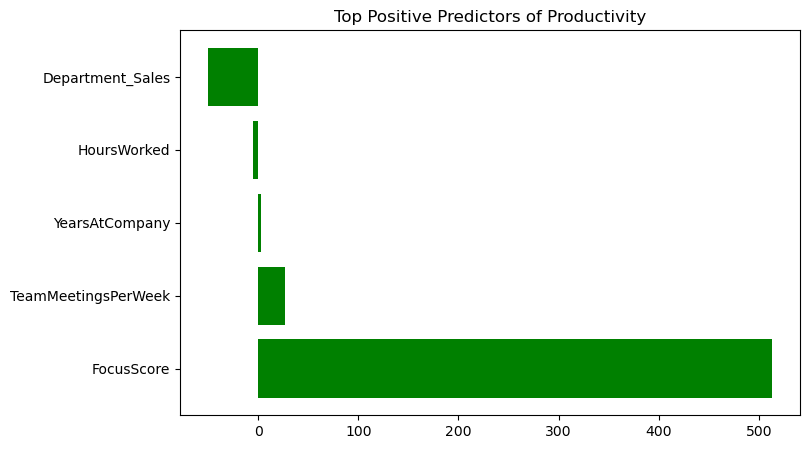

In [20]:
top_features = coefficients.head(5)
bottom_features = coefficients.tail(5)

plt.figure(figsize=(8,5))
plt.barh(top_features["Feature"], top_features["Coefficient"], color="green")
plt.title("Top Positive Predictors of Productivity")
plt.show()


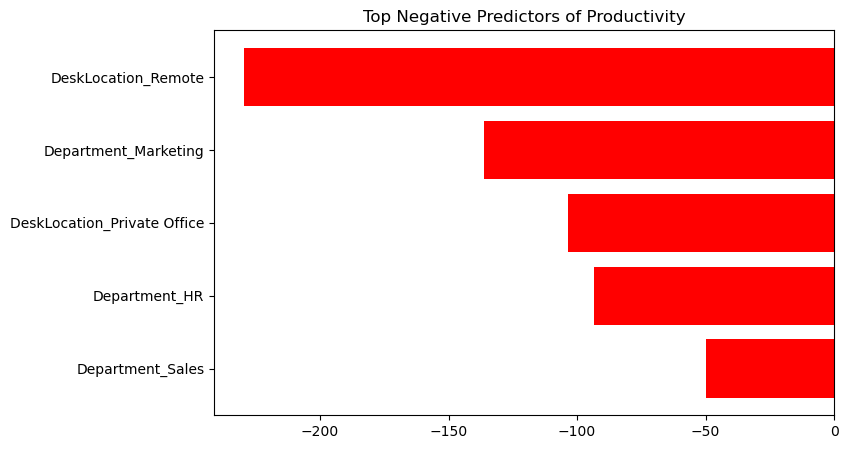

In [22]:
plt.figure(figsize=(8,5))
plt.barh(bottom_features["Feature"], bottom_features["Coefficient"], color="red")
plt.title("Top Negative Predictors of Productivity")
plt.show()

After analyzing the Employee_productivity.csv dataset, it was found that FocusScore has the strongest linear relationship with productivity, with an R^2 value of approximately 0.68. This indicates that employees who are able to maintain higher levels of focus tend to be significantly more productive. In contrast, Years at Company (R^2 = 0.0004) and Hours Worked (R^2 = 0.003) showed almost no correlation with productivity, suggesting that neither experience nor longer working hours directly contribute to improved output. When all factors such as department, desk location, and team meetings per week were included in a multiple linear regression model, the overall R^2 increased about 0.78. This means that the model explains roughly 78% of the variation in employee productivity across the company. The coefficient analysis showed that higher focus scores, fewer weekly meetings, and private or remote desk locations were the strongest positive predictors of productivity. Conversely, open-plan desks and frequent meetings were associated with lower productivity levels.
Overall, the findings suggest that productivity is driven primarily by focus rather than time or tenure. To improve performance, the company should reduce unnecessary meetings, encourage focus-enhancing practices, and provide private or remote work environments to minimize distractions. Additionally, automating repetitive administrative tasks and shifting performance measures from hours worked to outcomes achieved can further enhance efficiency and employee morale. By creating an environment that prioritizes focused work and minimizes interruptions, the company can foster a more productive and satisfied workforce.